# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [22]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [25]:
%%R
 
# Import data with R
df <- read_csv('mortgage_data_asian.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 13
  activity_year census_tract loan_type loan_purpose loan_amount income
          <dbl>        <dbl>     <dbl>        <dbl>       <dbl>  <dbl>
1          2022           NA         1            1      215000     NA
2          2022           NA         1            1      415000     NA
3          2022           NA         1            1     1425000     NA
4          2022  36091061401         1            1       75000     NA
# ℹ 7 more variables: property_value <chr>, `applicant_race-1` <dbl>,
#   `co-applicant_race-1` <dbl>, applicant_sex <dbl>, `co-applicant_sex` <dbl>,
#   applicant_age <chr>, `co-applicant_age` <chr>


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [26]:
%%R 

# get the mean, median, min, max, and standard deviation of the loan_amount

loan_amount_stats <- df %>%
    summarize(mean_mortgage = mean(loan_amount), 
              median_mortgage = median(loan_amount), 
              min_mortgage = min(loan_amount), 
              max_mortgage = max(loan_amount), 
              sd_mortgage = sd(loan_amount))

loan_amount_stats


# A tibble: 1 × 5
  mean_mortgage median_mortgage min_mortgage max_mortgage sd_mortgage
          <dbl>           <dbl>        <dbl>        <dbl>       <dbl>
1       501858.          315000         5000    900005000    3411085.


In [27]:
%%R

df$property_value <- as.numeric(as.character(df$property_value))

In addition: Warning message:
In (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  :
  NAs introduced by coercion


In [28]:
%%R 

# get the mean, median, min, max, and standard deviation of the property_value (excluding NA)

property_value_stats <- df %>%
    filter(!is.na(property_value)) %>%
    summarize(mean_property_value = mean(property_value), 
              median_property_value = median(property_value), 
              min_property_value = min(property_value), 
              max_property_value = max(property_value), 
              sd_property_value = sd(property_value))

property_value_stats

# A tibble: 1 × 5
  mean_property_value median_property_value min_property_value
                <dbl>                 <dbl>              <dbl>
1             683354.                415000               5000
# ℹ 2 more variables: max_property_value <dbl>, sd_property_value <dbl>


In [29]:
%%R

df$income <- as.numeric(as.character(df$income))

In [30]:
%%R 

# get the mean, median, min, max, and standard deviation of the income (K) (excluding NA)

income_stats <- df %>%
    filter(!is.na(income)) %>%
    summarize(mean_property_value = mean(income), 
              median_property_value = median(income), 
              min_property_value = min(income), 
              max_property_value = max(income), 
              sd_property_value = sd(income))

income_stats

# A tibble: 1 × 5
  mean_property_value median_property_value min_property_value
                <dbl>                 <dbl>              <dbl>
1                177.                   101              -2035
# ℹ 2 more variables: max_property_value <dbl>, sd_property_value <dbl>


In [31]:
%%R

discrete_variables <- c('income', 'property_value', 'loan_amount')
# 👉 Select the discrete variables only and make a pivot table for each
# so we know how many cars there are in each category (for example, how many automatic vs manual)?

df %>% 
  select(discrete_variables) %>%
  pivot_longer(discrete_variables, names_to = "variable", values_to = "value") %>% 
  group_by(variable, value) %>% 
  summarize(
    count = n(),
    .groups = 'drop'  # Add this line to drop the grouping
  )

# A tibble: 4,197 × 3
   variable value count
   <chr>    <dbl> <int>
 1 income   -2035     1
 2 income   -1815     1
 3 income    -783     1
 4 income    -771     1
 5 income    -569     1
 6 income    -518     1
 7 income    -463     1
 8 income    -390     1
 9 income    -359     1
10 income    -347     1
# ℹ 4,187 more rows
# ℹ Use `print(n = ...)` to see more rows


In [32]:
%%R
# Remove the NA and negative values from the income, property_value, and loan_amount columns
df <- df %>%
  filter(!is.na(income) & income > 0) %>%
  filter(!is.na(property_value) & property_value > 0) %>%
  filter(!is.na(loan_amount) & loan_amount > 0)

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

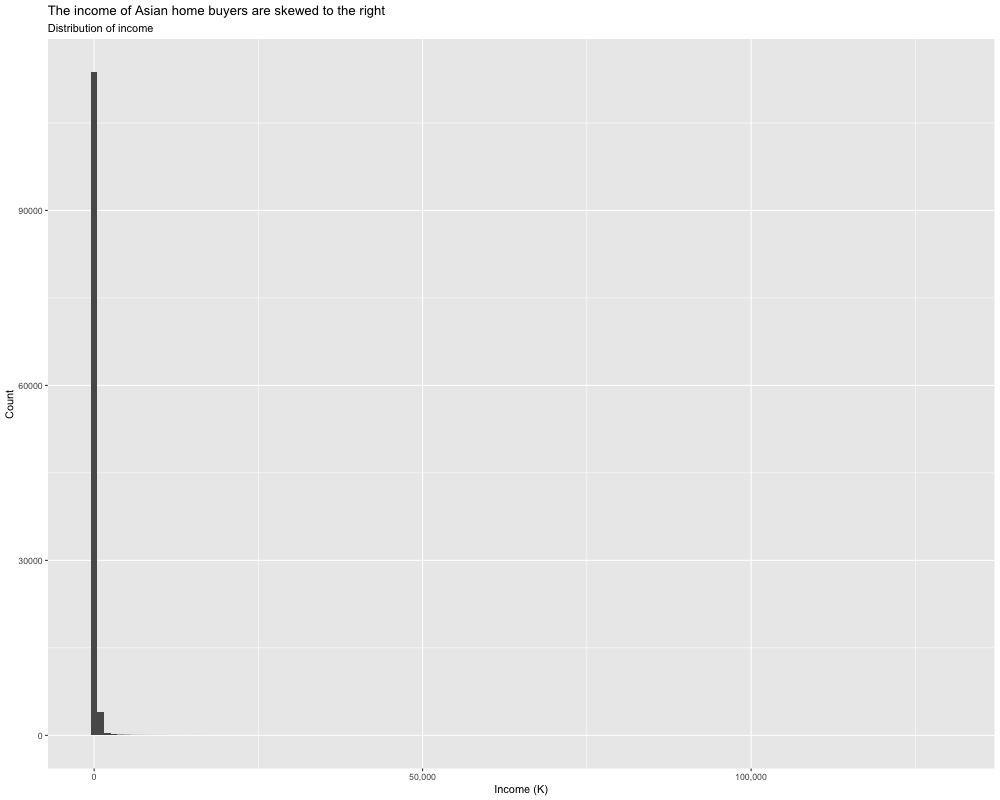

In [33]:
%%R -w 1000 -h 800

# Use ggplot to visualize the distribution of income using histogram and convert the amount from scientific notation to standard notation (excluding NA and data larger than 500 million)

df %>%
    filter(!is.na(income) & income < 500000000) %>%
    ggplot(aes(x = income)) +
    geom_histogram(binwidth = 1000) +
    scale_x_continuous(labels = scales::comma) +
    labs(title = 'The income of Asian home buyers are skewed to the right',
    subtitle = "Distribution of income", x = "Income (K)", y = "Count")


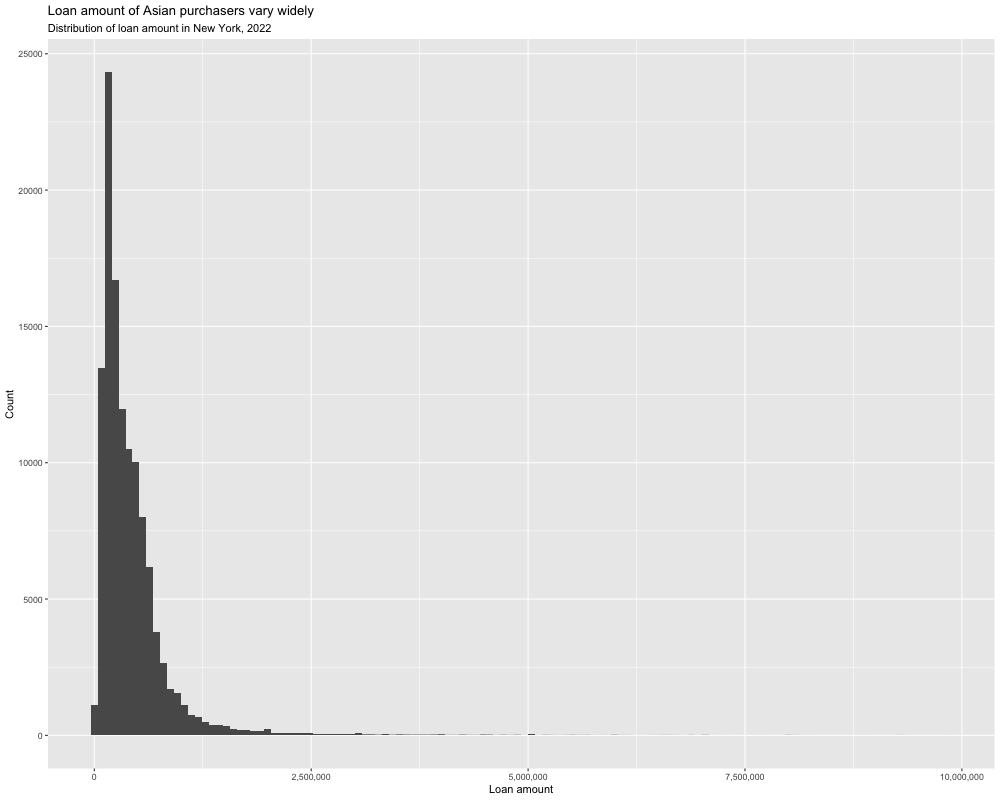

In [34]:
%%R -w 1000 -h 800

# Use ggplot to visualize the distribution of loan_amount using histogram and convert the amount from scientific notation to standard notation (excluding NA and amount higher than 10000000) 

df %>%
    filter(!is.na(loan_amount) & loan_amount < 10000000) %>%
    ggplot(aes(x = loan_amount)) +
    geom_histogram(binwidth = 80000) +
    scale_x_continuous(labels = scales::comma) +
    labs(title = "Loan amount of Asian purchasers vary widely",
    subtitle = "Distribution of loan amount in New York, 2022",
    x = "Loan amount", y = "Count")

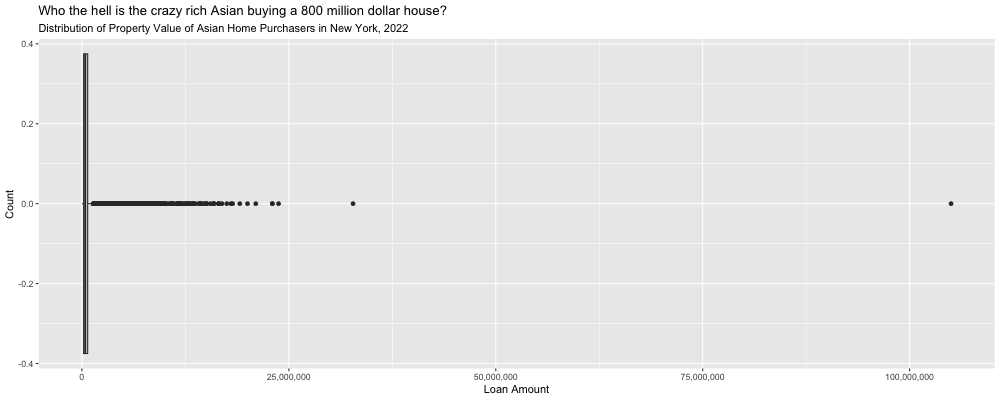

In [35]:
%%R -w 1000 -h 400

# Use ggplot to visualize the distribution of property value using horizontal boxplot and convert the amount from scientific notation to standard notation (excluding NA))

df %>%
    filter(!is.na(property_value)) %>%
    ggplot(aes(x = property_value)) +
    geom_boxplot() +
    scale_x_continuous(labels = scales::comma) +
    labs(title = "Who the hell is the crazy rich Asian buying a 800 million dollar house?",
         subtitle = "Distribution of Property Value of Asian Home Purchasers in New York, 2022",
         x = "Loan Amount",
         y = "Count")

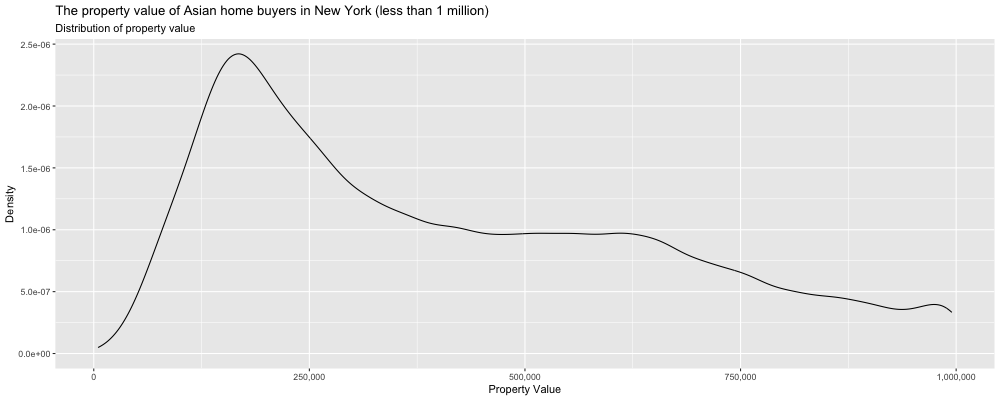

In [36]:
%%R -w 1000 -h 400

# Use ggplot to visualize the distribution of property value using density curve and convert the amount from scientific notation to standard notation (only include property value less than 25 million)

df %>%
    filter(!is.na(property_value) & property_value < 1000000) %>%
    ggplot(aes(x = property_value)) +
    geom_density() +
    scale_x_continuous(labels = scales::comma) +
    labs(title = "The property value of Asian home buyers in New York (less than 1 million)",
         subtitle = "Distribution of property value", x = "Property Value", y = "Density")

That house is in Murray Hill, East Midtown.

In [37]:
%%R

# What is the census tract with the most expensive property value?

df %>%
    filter(!is.na(property_value)) %>%
    arrange(desc(property_value)) %>%
    head(1)

# A tibble: 1 × 13
  activity_year census_tract loan_type loan_purpose loan_amount income
          <dbl>        <dbl>     <dbl>        <dbl>       <dbl>  <dbl>
1          2022  36005020501         1            1       25000     35
# ℹ 7 more variables: property_value <dbl>, `applicant_race-1` <dbl>,
#   `co-applicant_race-1` <dbl>, applicant_sex <dbl>, `co-applicant_sex` <dbl>,
#   applicant_age <chr>, `co-applicant_age` <chr>


### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

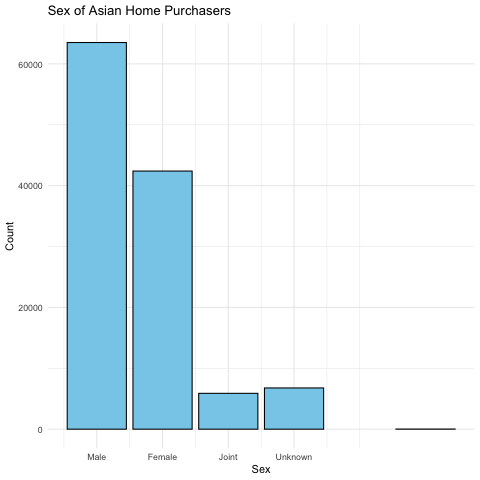

In [38]:
%%R

# Make a bar chart of the applicant_sex

df %>%  
    ggplot(aes(x = applicant_sex)) +
  geom_bar(fill = "skyblue", color = "black") +
  labs(title = "Sex of Asian Home Purchasers", x = "Sex", y = "Count") +
  theme_minimal() +
  scale_x_continuous(breaks = c(1, 2, 3, 4), labels = c("Male", "Female", "Joint", "Unknown"))

In [59]:
%%R

# Get a table of the number of applicants in each age category, excluding NA and 8888

df %>%
    filter(!is.na(applicant_age) & applicant_age != 8888) %>%
    group_by(applicant_age) %>%
    summarize(count = n(), .groups = 'drop') %>%
    arrange(desc(count))

# A tibble: 7 × 2
  applicant_age count
  <chr>         <int>
1 25-34         35137
2 35-44         33527
3 45-54         20404
4 55-64         11513
5 <25            5179
6 65-74          4122
7 >74             865


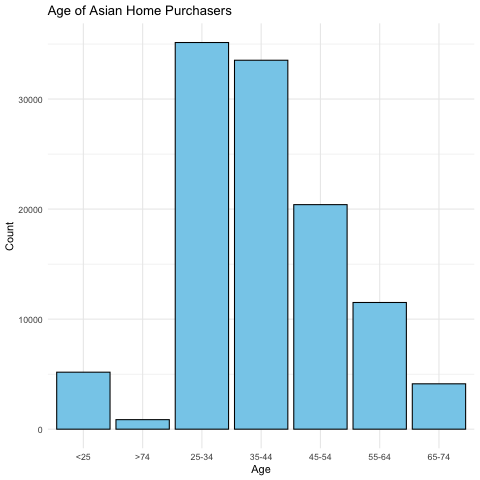

In [58]:
%%R

# Make a bar chart of the applicant_age, drop the NA and 8888 values

df %>%
    filter(!is.na(applicant_age) & applicant_age != 8888) %>%
    ggplot(aes(x = applicant_age)) +
    geom_bar(fill = "skyblue", color = "black") +
    labs(title = "Age of Asian Home Purchasers", x = "Age", y = "Count") +
    theme_minimal()

In [40]:
%%R

# Create a df of age and number of applicants, drop all NAs and age as 8888

asian_age_df <- df %>%
    filter(!is.na(applicant_age) & applicant_age != 8888) %>%
    group_by(applicant_age) %>%
    summarize(count = n())

asian_age_df %>% head(10)

# A tibble: 7 × 2
  applicant_age count
  <chr>         <int>
1 25-34         35137
2 35-44         33527
3 45-54         20404
4 55-64         11513
5 65-74          4122
6 <25            5179
7 >74             865


In [41]:
%%R
# Read in mortgage_data_white.csv as df_white

df_white <- read_csv('mortgage_data_white.csv', show_col_types = FALSE)

df_white %>% head(4)

# A tibble: 4 × 13
  activity_year census_tract loan_type loan_purpose loan_amount income
          <dbl>        <dbl>     <dbl>        <dbl>       <dbl>  <dbl>
1          2022  36061007400         1            1     2155000   2093
2          2022  36061016500         1            1     2175000    396
3          2022  36061011201         1            1     2005000     NA
4          2022  36091061002         1            1     1605000     NA
# ℹ 7 more variables: property_value <chr>, `applicant_race-1` <dbl>,
#   `co-applicant_race-1` <dbl>, applicant_sex <dbl>, `co-applicant_sex` <dbl>,
#   applicant_age <chr>, `co-applicant_age` <chr>


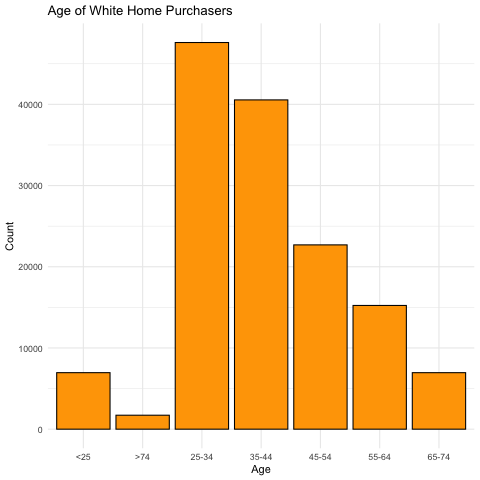

In [42]:
%%R

# Make a bar chart of the applicant_age for white home purchasers

df_white %>%
    filter(!is.na(applicant_age) & applicant_age != 8888) %>%
    ggplot(aes(x = applicant_age)) +
  geom_bar(fill = "orange", color = "black") +
  labs(title = "Age of White Home Purchasers", x = "Age", y = "Count") +
  theme_minimal()

In [60]:
%%R

# Create a table of number of applicants in each age category for white home purchasers, excluding NA and 8888

df_white %>%
    filter(!is.na(applicant_age) & applicant_age != 8888) %>%
    group_by(applicant_age) %>%
    summarize(count = n(), .groups = 'drop') %>%
    arrange(desc(count))

# A tibble: 7 × 2
  applicant_age count
  <chr>         <int>
1 25-34         47615
2 35-44         40548
3 45-54         22695
4 55-64         15237
5 <25            6959
6 65-74          6958
7 >74            1720


In [43]:
%%R

# For white, create a df of age and number of applicants, drop all NAs and age as 8888

white_age_df <- df_white %>%
    filter(!is.na(applicant_age) & applicant_age != 8888) %>%
    group_by(applicant_age) %>%
    summarize(count = n())

white_age_df %>% head(10)

# A tibble: 7 × 2
  applicant_age count
  <chr>         <int>
1 25-34         47615
2 35-44         40548
3 45-54         22695
4 55-64         15237
5 65-74          6958
6 <25            6959
7 >74            1720


In [44]:
%%R

# Run a chi-squared test to see if there is a significant difference in the age of Asian and white home purchasers

chisq.test(asian_age_df$count, white_age_df$count)


	Pearson's Chi-squared test

data:  asian_age_df$count and white_age_df$count
X-squared = 42, df = 36, p-value = 0.227



In addition: Warning message:
In chisq.test(asian_age_df$count, white_age_df$count) :
  Chi-squared approximation may be incorrect


In [45]:
%%R

# Drop all NAs for property_value in df_white

df_white$property_value <- as.numeric(as.character(df_white$property_value))

In addition: Warning message:
In (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  :
  NAs introduced by coercion


In [46]:
%%R

#Get the summary data for property_value for white home purchasers

property_value_stats_white <- df_white %>%
    filter(!is.na(property_value)) %>%
    summarize(mean_property_value = mean(property_value), 
              median_property_value = median(property_value), 
              min_property_value = min(property_value), 
              max_property_value = max(property_value), 
              sd_property_value = sd(property_value))

property_value_stats_white

# A tibble: 1 × 5
  mean_property_value median_property_value min_property_value
                <dbl>                 <dbl>              <dbl>
1             578493.                385000               5000
# ℹ 2 more variables: max_property_value <dbl>, sd_property_value <dbl>


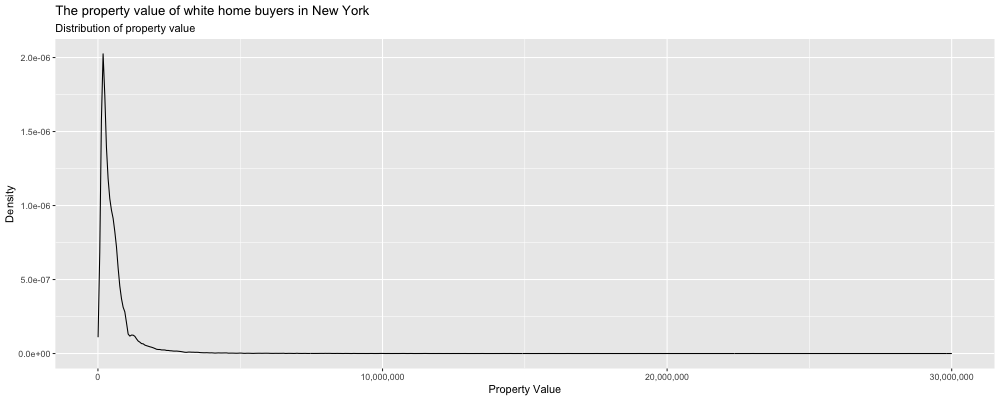

In [52]:
%%R -w 1000 -h 400
# Plot the distribution of property_value for white home purchasers using density curve

df_white %>%
    filter(!is.na(property_value)) %>%
    ggplot(aes(x = property_value)) +
    geom_density() +
    scale_x_continuous(labels = scales::comma) +
    labs(title = "The property value of white home buyers in New York",
         subtitle = "Distribution of property value", x = "Property Value", y = "Density")

In [47]:
%%R

# Drop all NAs for property_value in df_asian

df$property_value <- as.numeric(as.character(df$property_value))

In [48]:
%%R

#Get the summary data for property_value for asian home purchasers

property_value_stats_asian <- df %>%
    filter(!is.na(property_value)) %>%
    summarize(mean_property_value = mean(property_value), 
              median_property_value = median(property_value), 
              min_property_value = min(property_value), 
              max_property_value = max(property_value), 
              sd_property_value = sd(property_value))

property_value_stats_asian

# A tibble: 1 × 5
  mean_property_value median_property_value min_property_value
                <dbl>                 <dbl>              <dbl>
1             569477.                405000               5000
# ℹ 2 more variables: max_property_value <dbl>, sd_property_value <dbl>


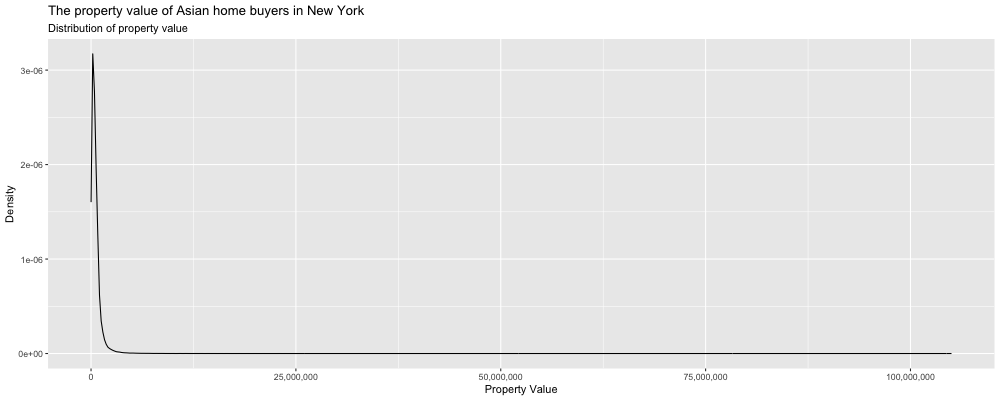

In [53]:
%%R -w 1000 -h 400

# Plot the distribution of property_value for asian home purchasers using density curve

df %>%
    filter(!is.na(property_value)) %>%
    ggplot(aes(x = property_value)) +
    geom_density() +
    scale_x_continuous(labels = scales::comma) +
    labs(title = "The property value of Asian home buyers in New York",
         subtitle = "Distribution of property value", x = "Property Value", y = "Density")

In [49]:
%%R

# Run a t-test to see if there is a significant difference in the property value of Asian and white home purchasers

t.test(df$property_value, df_white$property_value)


	Welch Two Sample t-test

data:  df$property_value and df_white$property_value
t = -2.819, df = 238163, p-value = 0.004818
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15286.08  -2747.72
sample estimates:
mean of x mean of y 
 569476.6  578493.5 

